# 🎯 Objective

**The aim of this hackathon is to perform data-driven analysis of restaurant trends in Bangalore using Zomato’s real-world dataset.**


1. **Clean and preprocess the data**:
- Handle missing or incorrect values- Convert columns to the correct data types
- Clean specific columns like `rate`, `approx_costfor_two_people`,etc.

2. **Merge geographical data**:
- Combine restaurant data with geographical coordinates based on the city name (`listed_incity`) to perform location-based analysis.


3. **Perform Exploratory Data Analysis (EDA)**:
- Analyze the dataset using various visualization tools
- Identify trends, patterns, and relationships in the data (ratings, votes, cuisine types, cost, etc.)


4. **Extract actionable insights**:
- Derive meaningful insights such as regions with the highest restaurant density, the popularity of different cuisines, etc.


5. **Answer MCQ-style reasoning questions**:
- Provide answers to multiple-choice questions based on the insights gathered from the EDA and analysis.


# `🧑‍💻Let's Start🧑‍💻`

### `🚀Import Required Libraries`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time


### `📦Read the Dataset`

In [2]:
df_restaurants = pd.read_csv(r"C:\Users\Arpan Ghosh\OneDrive\Desktop\Hackathon Zomato\zomato_data.csv")
df_locations = pd.read_csv(r"C:\Users\Arpan Ghosh\OneDrive\Desktop\Hackathon Zomato\Geographical Coordinates.csv")

In [3]:
df_restaurants.head()

online_order book_table   rate  votes            rest_type  \
0          Yes        Yes  4.1/5    775        Casual Dining   
1          Yes         No  4.1/5    787        Casual Dining   
2          Yes         No  3.8/5    918  Cafe, Casual Dining   
3           No         No  3.7/5     88          Quick Bites   
4           No         No  3.8/5    166        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_costfor_two_people listed_intype  \
0  North Indian, Mughlai, Chinese                       800        Buffet   
1     Chinese, North Indian, Thai                       800        Buffet   
2          Cafe, Mexican, Italian                       800        Buffet   
3      South Indian, North Indian                       300        Buffet   
4        North Indian, Rajasthani                       600        Buffet   

  listed_incity  
0  Banashankari  
1  Banashankari  
2  Banashankari  
3  Banashankari  
4  Banashankari

In [4]:
df_restaurants.shape

(51717, 10)

In [5]:
df_locations.head()

listed_incity   Latitude  Longitude
0       Banashankari  12.939333  77.553982
1  Bannerghatta Road  12.952660  77.605048
2       Basavanagudi  12.941726  77.575502
3          Bellandur  12.925352  77.675941
4       Brigade Road  12.967358  77.606435

In [6]:
df_locations.shape

(26, 3)

In [7]:
df_restaurants.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'dish_liked', 'cuisines', 'approx_costfor_two_people', 'listed_intype',
       'listed_incity'],
      dtype='object')

### `🛠️Data Cleaning & Preprocessing for Restaurants Data`

In [8]:
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   online_order               51717 non-null  object
 1   book_table                 51717 non-null  object
 2   rate                       43942 non-null  object
 3   votes                      51717 non-null  int64 
 4   rest_type                  51490 non-null  object
 5   dish_liked                 23639 non-null  object
 6   cuisines                   51672 non-null  object
 7   approx_costfor_two_people  51371 non-null  object
 8   listed_intype              51717 non-null  object
 9   listed_incity              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [9]:
df_restaurants.describe()

votes
count  51717.000000
mean     283.697527
std      803.838853
min        0.000000
25%        7.000000
50%       41.000000
75%      198.000000
max    16832.000000

**`📊Rating Column (rate)`**

In [10]:
df_restaurants["rate"]

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51717, dtype: object

In [11]:
df_restaurants["rate"] = df_restaurants["rate"].str.replace("/5", '')

In [12]:
df_restaurants["rate"] = df_restaurants["rate"].replace(['NEW', '-', ''], np.nan)

In [13]:
# Convert to numeric, invalid values will be NaN

df_restaurants['rate'] = pd.to_numeric(df_restaurants['rate'], errors='coerce')

In [14]:
df_restaurants['rate'].isnull().sum()

10052

In [15]:
df_restaurants['rate'].fillna(df_restaurants['rate'].median(), inplace = True)

In [16]:
df_restaurants['rate'].isnull().sum()

0

In [17]:
df_restaurants['rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51717 entries, 0 to 51716
Series name: rate
Non-Null Count  Dtype  
--------------  -----  
51717 non-null  float64
dtypes: float64(1)
memory usage: 404.2 KB


In [18]:
#df_restaurants['rate'].describe()

**`📊Cost Column (approx_costfor_two_people)`**

In [19]:
df_restaurants['approx_costfor_two_people']

0          800
1          800
2          800
3          300
4          600
         ...  
51712    1,500
51713      600
51714    2,000
51715    2,500
51716    1,500
Name: approx_costfor_two_people, Length: 51717, dtype: object

In [20]:
df_restaurants['approx_costfor_two_people'] = df_restaurants['approx_costfor_two_people'].replace({',': ''}, regex=True)

In [21]:
df_restaurants['approx_costfor_two_people']

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_costfor_two_people, Length: 51717, dtype: object

In [22]:
df_restaurants['approx_costfor_two_people'].isnull().sum()

346

In [23]:
df_restaurants['approx_costfor_two_people'].fillna(df_restaurants['approx_costfor_two_people'].median(), inplace = True)

In [24]:
df_restaurants['approx_costfor_two_people'].isnull().sum()

0

In [25]:
df_restaurants['approx_costfor_two_people'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51717 entries, 0 to 51716
Series name: approx_costfor_two_people
Non-Null Count  Dtype 
--------------  ----- 
51717 non-null  object
dtypes: object(1)
memory usage: 404.2+ KB


In [26]:
df_restaurants['approx_costfor_two_people'] = df_restaurants['approx_costfor_two_people'].astype(int)

In [27]:
df_restaurants['approx_costfor_two_people'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51717 entries, 0 to 51716
Series name: approx_costfor_two_people
Non-Null Count  Dtype
--------------  -----
51717 non-null  int32
dtypes: int32(1)
memory usage: 202.1 KB


**`📊Dish Liked`**

In [28]:
df_restaurants['dish_liked']

0        Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1        Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2        Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                              Masala Dosa
4                                      Panipuri, Gol Gappe
                               ...                        
51712                                                  NaN
51713                                                  NaN
51714                                                  NaN
51715                         Cocktails, Pizza, Buttermilk
51716                                                  NaN
Name: dish_liked, Length: 51717, dtype: object

In [29]:
df_restaurants['dish_liked'].isnull().sum()

28078

In [30]:
df_restaurants['dish_liked'].fillna("Not Available", inplace = True)

In [31]:
df_restaurants['dish_liked'].isnull().sum()

0

In [32]:
df_restaurants['dish_liked']

0        Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1        Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2        Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                              Masala Dosa
4                                      Panipuri, Gol Gappe
                               ...                        
51712                                        Not Available
51713                                        Not Available
51714                                        Not Available
51715                         Cocktails, Pizza, Buttermilk
51716                                        Not Available
Name: dish_liked, Length: 51717, dtype: object

**`📊Cuisines`**

In [33]:
df_restaurants['cuisines']

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51717, dtype: object

In [34]:
df_restaurants['cuisines'].isnull().sum()

45

In [35]:
df_restaurants['cuisines'].fillna("Other", inplace = True)

In [36]:
df_restaurants['cuisines'].isnull().sum()

0

**`📊Restaurants Type`**

In [37]:
df_restaurants['rest_type']

0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
51712                    Bar
51713                    Bar
51714                    Bar
51715                    Bar
51716     Bar, Casual Dining
Name: rest_type, Length: 51717, dtype: object

In [38]:
df_restaurants['rest_type'].isnull().sum()

227

In [39]:
df_restaurants['rest_type'].fillna("Unknown", inplace = True)

In [40]:
df_restaurants['rest_type'].isnull().sum()

0

In [41]:
df_restaurants['rest_type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51717 entries, 0 to 51716
Series name: rest_type
Non-Null Count  Dtype 
--------------  ----- 
51717 non-null  object
dtypes: object(1)
memory usage: 404.2+ KB


**`📊Votes`**

In [42]:
df_restaurants["votes"]

0        775
1        787
2        918
3         88
4        166
        ... 
51712     27
51713      0
51714      0
51715    236
51716     13
Name: votes, Length: 51717, dtype: int64

In [43]:
df_restaurants["votes"].isnull().sum()

0

### `🔗Binary Encoding`

In [44]:
df_restaurants['online_order']

0        Yes
1        Yes
2        Yes
3         No
4         No
        ... 
51712     No
51713     No
51714     No
51715     No
51716     No
Name: online_order, Length: 51717, dtype: object

In [45]:
df_restaurants['online_order'] = df_restaurants['online_order'].map({'Yes': 1, 'No': 0})


In [46]:
df_restaurants['online_order']

0        1
1        1
2        1
3        0
4        0
        ..
51712    0
51713    0
51714    0
51715    0
51716    0
Name: online_order, Length: 51717, dtype: int64

In [47]:
df_restaurants['book_table']

0        Yes
1         No
2         No
3         No
4         No
        ... 
51712     No
51713     No
51714     No
51715    Yes
51716     No
Name: book_table, Length: 51717, dtype: object

In [48]:
df_restaurants['book_table'] = df_restaurants['book_table'].map({'Yes': 1, 'No': 0})

In [49]:
df_restaurants['book_table']

0        1
1        0
2        0
3        0
4        0
        ..
51712    0
51713    0
51714    0
51715    1
51716    0
Name: book_table, Length: 51717, dtype: int64

In [50]:
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int64  
 1   book_table                 51717 non-null  int64  
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  int32  
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 3.7+ MB


In [51]:
df_restaurants.isnull().sum()

online_order                 0
book_table                   0
rate                         0
votes                        0
rest_type                    0
dish_liked                   0
cuisines                     0
approx_costfor_two_people    0
listed_intype                0
listed_incity                0
dtype: int64

In [53]:
df_restaurants.describe()

online_order    book_table          rate         votes  \
count  51717.000000  51717.000000  51717.000000  51717.000000   
mean       0.588665      0.124698      3.700362    283.697527   
std        0.492080      0.330379      0.395391    803.838853   
min        0.000000      0.000000      1.800000      0.000000   
25%        0.000000      0.000000      3.500000      7.000000   
50%        1.000000      0.000000      3.700000     41.000000   
75%        1.000000      0.000000      3.900000    198.000000   
max        1.000000      1.000000      4.900000  16832.000000   

       approx_costfor_two_people  
count               51717.000000  
mean                  554.391689  
std                   437.563723  
min                    40.000000  
25%                   300.000000  
50%                   400.000000  
75%                   650.000000  
max                  6000.000000

In [54]:
df_restaurants.duplicated().sum()

957

In [55]:
df_restaurants[df_restaurants.duplicated()]

online_order  book_table  rate  votes           rest_type  \
135               0           0   3.7      0  Takeaway, Delivery   
526               0           0   3.7      0              Bakery   
596               1           1   3.7      0       Casual Dining   
720               0           0   3.7      0         Quick Bites   
737               0           0   3.7      0         Quick Bites   
...             ...         ...   ...    ...                 ...   
51627             0           0   3.7      0         Quick Bites   
51638             0           0   3.7      0         Quick Bites   
51642             0           0   3.7      0         Quick Bites   
51643             0           0   3.7      0         Quick Bites   
51644             0           0   3.7      0         Quick Bites   

          dish_liked                               cuisines  \
135    Not Available                           South Indian   
526    Not Available                                 Bakery   
596    Not Available  Continental, Asian, North Indian, Tea   
720    Not Available                           South Indian   
737    Not Available                           South Indian   
...              ...                                    ...   
51627  Not Available                           North Indian   
51638  Not Available                  North Indian, Chinese   
51642  Not Available                           South Indian   
51643  Not Available                         Biryani, Kebab   
51644  Not Available                           North Indian   

       approx_costfor_two_people listed_intype listed_incity  
135                          400      Delivery  Banashankari  
526                          300      Desserts  Banashankari  
596                          500      Dine-out  Banashankari  
720                          100      Dine-out  Banashankari  
737                          150      Dine-out  Banashankari  
...                          ...           ...           ...  
51627                        300      Dine-out    Whitefield  
51638                        300      Dine-out    Whitefield  
51642                        200      Dine-out    Whitefield  
51643                        300      Dine-out    Whitefield  
51644                        400      Dine-out    Whitefield  

[957 rows x 10 columns]

In [56]:
df_restaurants.drop_duplicates(inplace = True)

In [57]:
df_restaurants.duplicated().sum()

0

In [58]:
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50760 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               50760 non-null  int64  
 1   book_table                 50760 non-null  int64  
 2   rate                       50760 non-null  float64
 3   votes                      50760 non-null  int64  
 4   rest_type                  50760 non-null  object 
 5   dish_liked                 50760 non-null  object 
 6   cuisines                   50760 non-null  object 
 7   approx_costfor_two_people  50760 non-null  int32  
 8   listed_intype              50760 non-null  object 
 9   listed_incity              50760 non-null  object 
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 4.1+ MB


### `🛠️Data Cleaning & Preprocessing for Locations Data`

In [59]:
df_locations.head()

listed_incity   Latitude  Longitude
0       Banashankari  12.939333  77.553982
1  Bannerghatta Road  12.952660  77.605048
2       Basavanagudi  12.941726  77.575502
3          Bellandur  12.925352  77.675941
4       Brigade Road  12.967358  77.606435

In [60]:
df_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   listed_incity  26 non-null     object 
 1   Latitude       26 non-null     float64
 2   Longitude      26 non-null     float64
dtypes: float64(2), object(1)
memory usage: 756.0+ bytes


In [61]:
df_locations.isnull().sum()

listed_incity    0
Latitude         0
Longitude        0
dtype: int64

In [62]:
df_locations.duplicated().sum()

0

### `🔗Merge Restaurant Data & Locations Data`

In [63]:
df_restaurants.head(5)

online_order  book_table  rate  votes            rest_type  \
0             1           1   4.1    775        Casual Dining   
1             1           0   4.1    787        Casual Dining   
2             1           0   3.8    918  Cafe, Casual Dining   
3             0           0   3.7     88          Quick Bites   
4             0           0   3.8    166        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_costfor_two_people listed_intype  \
0  North Indian, Mughlai, Chinese                        800        Buffet   
1     Chinese, North Indian, Thai                        800        Buffet   
2          Cafe, Mexican, Italian                        800        Buffet   
3      South Indian, North Indian                        300        Buffet   
4        North Indian, Rajasthani                        600        Buffet   

  listed_incity  
0  Banashankari  
1  Banashankari  
2  Banashankari  
3  Banashankari  
4  Banashankari

In [64]:
df_locations.head(5)

listed_incity   Latitude  Longitude
0       Banashankari  12.939333  77.553982
1  Bannerghatta Road  12.952660  77.605048
2       Basavanagudi  12.941726  77.575502
3          Bellandur  12.925352  77.675941
4       Brigade Road  12.967358  77.606435

In [65]:
merged_df = pd.merge(df_restaurants, df_locations, on='listed_incity', how='left')

In [66]:
merged_df

online_order  book_table  rate  votes            rest_type  \
0                 1           1   4.1    775        Casual Dining   
1                 1           0   4.1    787        Casual Dining   
2                 1           0   3.8    918  Cafe, Casual Dining   
3                 0           0   3.7     88          Quick Bites   
4                 0           0   3.8    166        Casual Dining   
...             ...         ...   ...    ...                  ...   
50755             0           0   3.6     27                  Bar   
50756             0           0   3.7      0                  Bar   
50757             0           0   3.7      0                  Bar   
50758             0           1   4.3    236                  Bar   
50759             0           0   3.4     13   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                            Masala Dosa   
4                                    Panipuri, Gol Gappe   
...                                                  ...   
50755                                      Not Available   
50756                                      Not Available   
50757                                      Not Available   
50758                       Cocktails, Pizza, Buttermilk   
50759                                      Not Available   

                                     cuisines  approx_costfor_two_people  \
0              North Indian, Mughlai, Chinese                        800   
1                 Chinese, North Indian, Thai                        800   
2                      Cafe, Mexican, Italian                        800   
3                  South Indian, North Indian                        300   
4                    North Indian, Rajasthani                        600   
...                                       ...                        ...   
50755                             Continental                       1500   
50756                             Finger Food                        600   
50757                             Finger Food                       2000   
50758                             Finger Food                       2500   
50759  Finger Food, North Indian, Continental                       1500   

       listed_intype listed_incity   Latitude  Longitude  
0             Buffet  Banashankari  12.939333  77.553982  
1             Buffet  Banashankari  12.939333  77.553982  
2             Buffet  Banashankari  12.939333  77.553982  
3             Buffet  Banashankari  12.939333  77.553982  
4             Buffet  Banashankari  12.939333  77.553982  
...              ...           ...        ...        ...  
50755  Pubs and bars    Whitefield        NaN        NaN  
50756  Pubs and bars    Whitefield        NaN        NaN  
50757  Pubs and bars    Whitefield        NaN        NaN  
50758  Pubs and bars    Whitefield        NaN        NaN  
50759  Pubs and bars    Whitefield        NaN        NaN  

[50760 rows x 12 columns]

In [67]:
merged_df.shape

(50760, 12)

In [68]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50760 entries, 0 to 50759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               50760 non-null  int64  
 1   book_table                 50760 non-null  int64  
 2   rate                       50760 non-null  float64
 3   votes                      50760 non-null  int64  
 4   rest_type                  50760 non-null  object 
 5   dish_liked                 50760 non-null  object 
 6   cuisines                   50760 non-null  object 
 7   approx_costfor_two_people  50760 non-null  int32  
 8   listed_intype              50760 non-null  object 
 9   listed_incity              50760 non-null  object 
 10  Latitude                   45301 non-null  float64
 11  Longitude                  45301 non-null  float64
dtypes: float64(3), int32(1), int64(3), object(5)
memory usage: 4.8+ MB


In [69]:
merged_df.isnull().sum()

online_order                    0
book_table                      0
rate                            0
votes                           0
rest_type                       0
dish_liked                      0
cuisines                        0
approx_costfor_two_people       0
listed_intype                   0
listed_incity                   0
Latitude                     5459
Longitude                    5459
dtype: int64

In [70]:
merged_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

In [71]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45301 entries, 0 to 45300
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               45301 non-null  int64  
 1   book_table                 45301 non-null  int64  
 2   rate                       45301 non-null  float64
 3   votes                      45301 non-null  int64  
 4   rest_type                  45301 non-null  object 
 5   dish_liked                 45301 non-null  object 
 6   cuisines                   45301 non-null  object 
 7   approx_costfor_two_people  45301 non-null  int32  
 8   listed_intype              45301 non-null  object 
 9   listed_incity              45301 non-null  object 
 10  Latitude                   45301 non-null  float64
 11  Longitude                  45301 non-null  float64
dtypes: float64(3), int32(1), int64(3), object(5)
memory usage: 4.3+ MB


In [146]:
merged_df.isnull().sum()

online_order                 0
book_table                   0
rate                         0
votes                        0
rest_type                    0
dish_liked                   0
cuisines                     0
approx_costfor_two_people    0
listed_intype                0
listed_incity                0
Latitude                     0
Longitude                    0
dtype: int64

In [147]:
merged_df.head()

online_order  book_table  rate  votes            rest_type  \
0             1           1   4.1    775        Casual Dining   
1             1           0   4.1    787        Casual Dining   
2             1           0   3.8    918  Cafe, Casual Dining   
3             0           0   3.7     88          Quick Bites   
4             0           0   3.8    166        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_costfor_two_people listed_intype  \
0  North Indian, Mughlai, Chinese                        800        Buffet   
1     Chinese, North Indian, Thai                        800        Buffet   
2          Cafe, Mexican, Italian                        800        Buffet   
3      South Indian, North Indian                        300        Buffet   
4        North Indian, Rajasthani                        600        Buffet   

  listed_incity   Latitude  Longitude  
0  Banashankari  12.939333  77.553982  
1  Banashankari  12.939333  77.553982  
2  Banashankari  12.939333  77.553982  
3  Banashankari  12.939333  77.553982  
4  Banashankari  12.939333  77.553982

### `📈Exploratory Data Analysis (EDA)`

**`📊Top 10 Cuisines`**

In [73]:
top_10_cuisines = merged_df['cuisines'].value_counts().head(10)
top_10_cuisines

North Indian                           2430
North Indian, Chinese                  2074
South Indian                           1368
Bakery, Desserts                        786
Biryani                                 748
Cafe                                    672
Fast Food                               664
Desserts                                650
South Indian, North Indian, Chinese     630
Bakery                                  547
Name: cuisines, dtype: int64

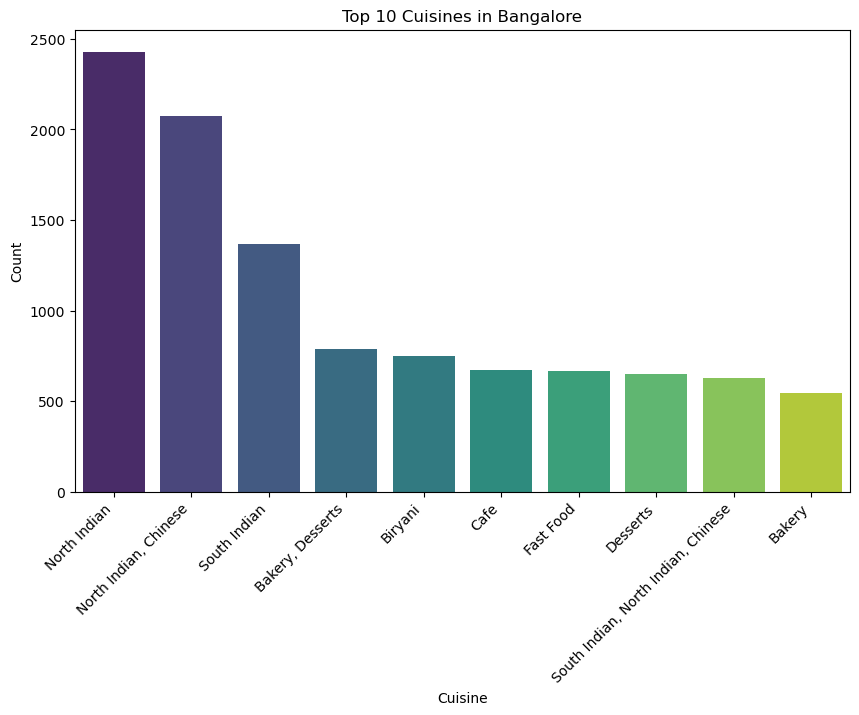

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cuisines.index, y=top_10_cuisines.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cuisines in Bangalore')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()

**`📊Online Order Availability`**

In [75]:
online_order_counts = merged_df['online_order'].value_counts()
online_order_counts

1    27362
0    17939
Name: online_order, dtype: int64

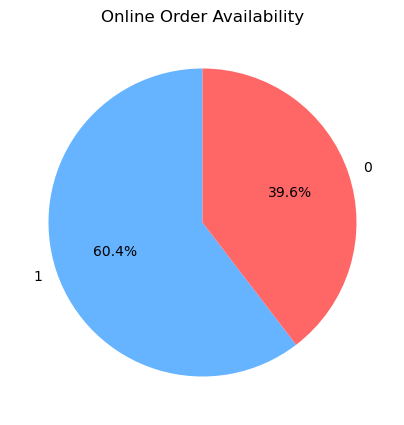

In [76]:
plt.figure(figsize=(5, 5))
plt.pie(online_order_counts, labels=online_order_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff6666'], startangle=90)
plt.title('Online Order Availability')
plt.show()

In [77]:
merged_df.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'dish_liked', 'cuisines', 'approx_costfor_two_people', 'listed_intype',
       'listed_incity', 'Latitude', 'Longitude'],
      dtype='object')

**`📊Book Table`**

In [78]:
book_table_counts = merged_df['book_table'].value_counts()
book_table_counts

0    39601
1     5700
Name: book_table, dtype: int64

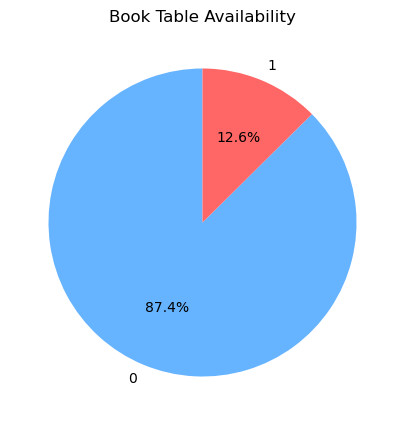

In [79]:
plt.figure(figsize=(5, 5))
plt.pie(book_table_counts, labels=book_table_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff6666'], startangle=90)
plt.title('Book Table Availability')
plt.show()

**`📊Cost Distribution`**

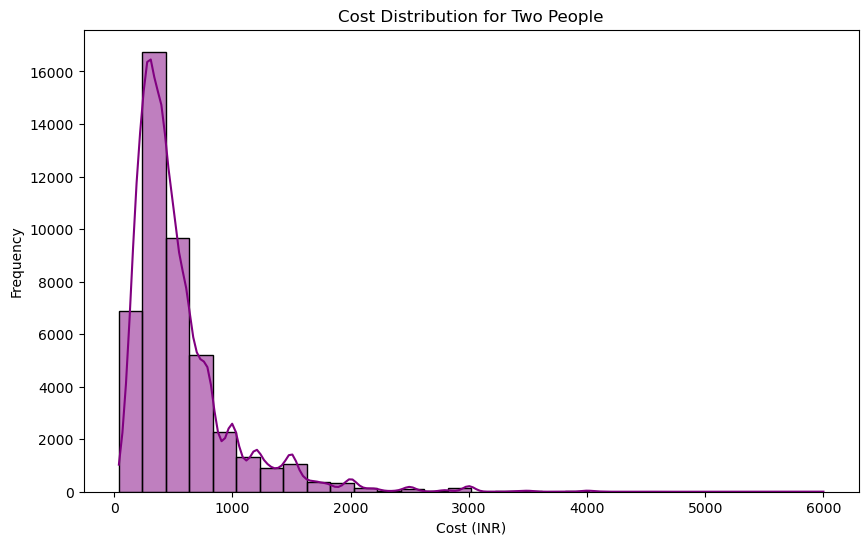

In [80]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['approx_costfor_two_people'], bins=30, kde=True, color='purple')
plt.title('Cost Distribution for Two People')
plt.xlabel('Cost (INR)')
plt.ylabel('Frequency')
plt.show()


<Axes: xlabel='approx_costfor_two_people'>

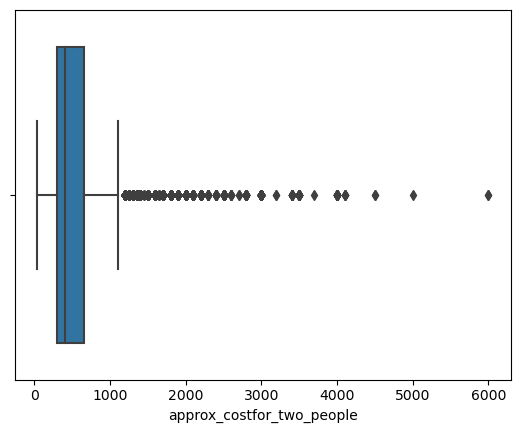

In [81]:
sns.boxplot(x = merged_df['approx_costfor_two_people'])

**`📊Ratings vs Votes`**

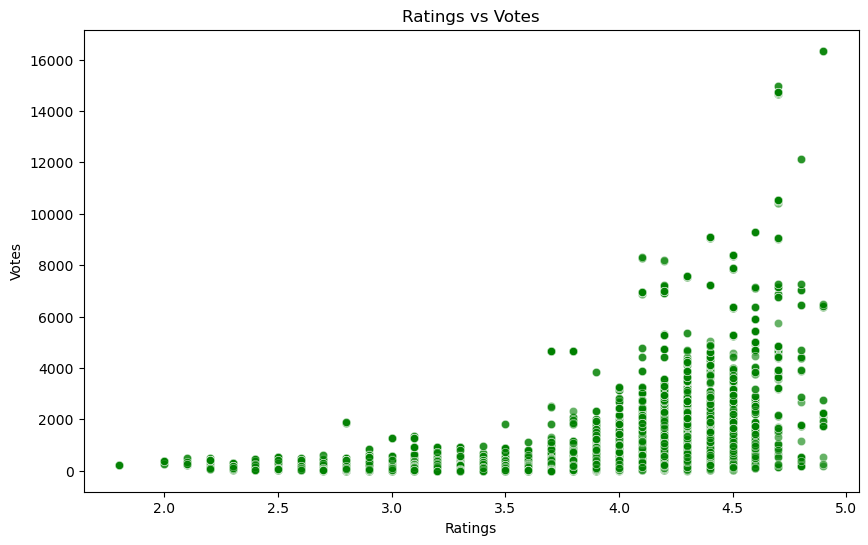

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rate', y='votes', data=merged_df, alpha=0.6, markers= "*", color='green')
plt.title('Ratings vs Votes')
plt.xlabel('Ratings')
plt.ylabel('Votes')
plt.show()


**`📊Most Common Cuisines, Restaurant Types, and Areas`**

In [83]:
top_rest_types = merged_df['rest_type'].value_counts().head(10)
top_rest_types

Quick Bites           16502
Casual Dining          9203
Cafe                   3443
Delivery               2323
Dessert Parlor         1986
Takeaway, Delivery     1816
Casual Dining, Bar     1008
Bakery                  958
Beverage Shop           786
Bar                     628
Name: rest_type, dtype: int64

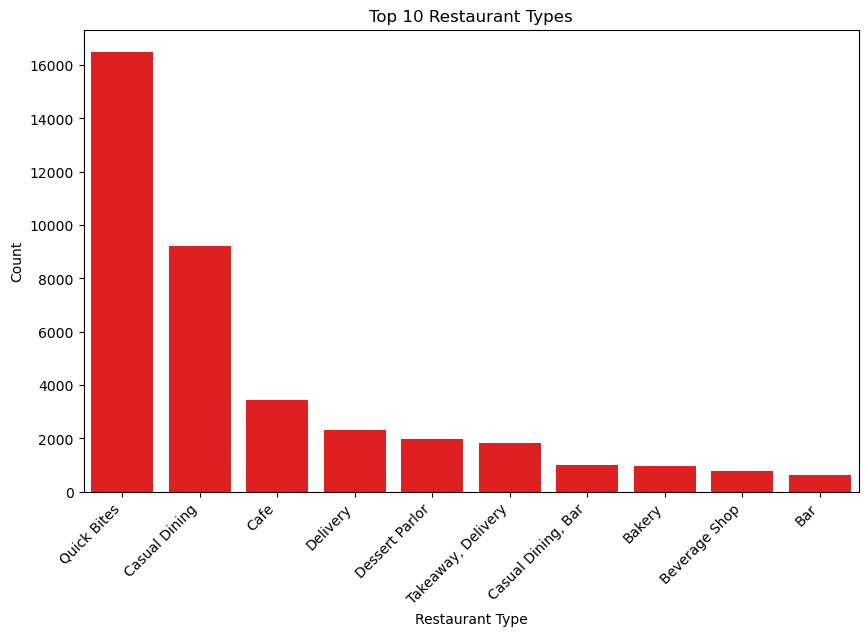

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_rest_types.index, y=top_rest_types.values, color='r')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.show()

In [85]:
top_10_areas = merged_df['listed_incity'].value_counts().head(10)
top_10_areas

BTM                      3200
Koramangala 7th Block    2880
Koramangala 5th Block    2781
Koramangala 4th Block    2735
Koramangala 6th Block    2580
Jayanagar                2334
JP Nagar                 2063
Indiranagar              1839
MG Road                  1785
Church Street            1776
Name: listed_incity, dtype: int64

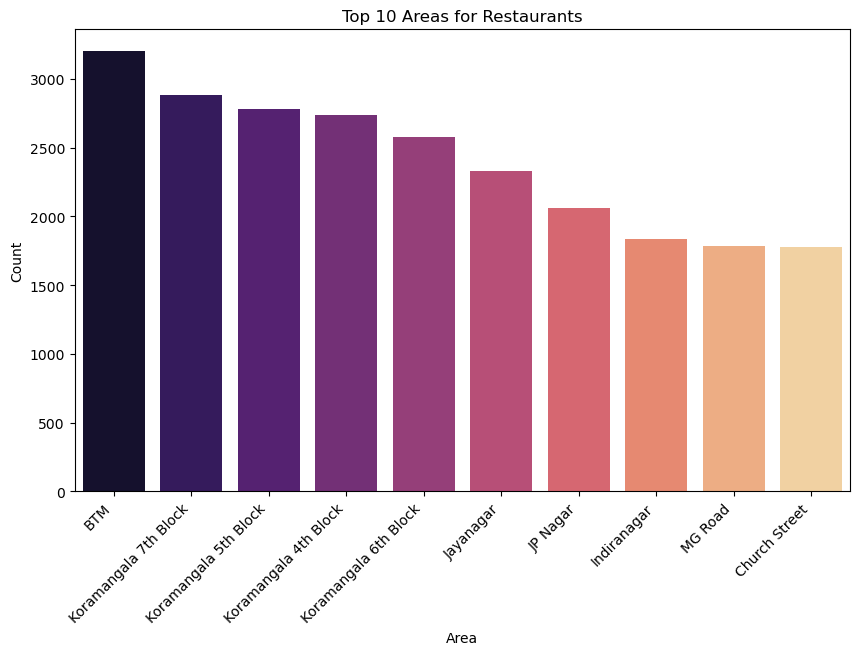

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_areas.index, y=top_10_areas.values, palette='magma')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Areas for Restaurants')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

In [87]:
top_10_cuisines = merged_df['cuisines'].value_counts().head(10)
top_10_cuisines

North Indian                           2430
North Indian, Chinese                  2074
South Indian                           1368
Bakery, Desserts                        786
Biryani                                 748
Cafe                                    672
Fast Food                               664
Desserts                                650
South Indian, North Indian, Chinese     630
Bakery                                  547
Name: cuisines, dtype: int64

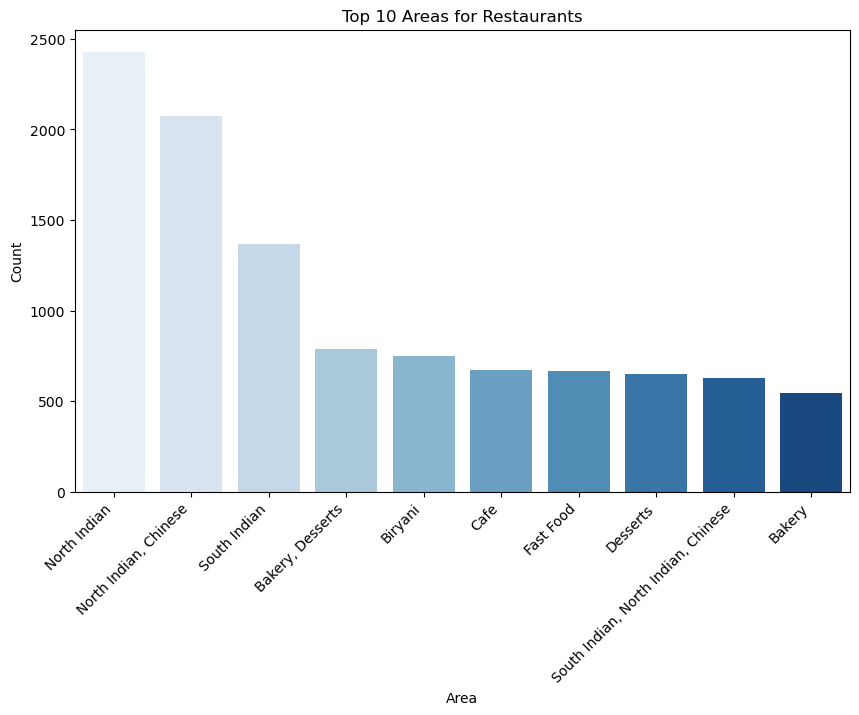

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cuisines.index, y=top_10_cuisines.values, palette='Blues')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Areas for Restaurants')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

**`📊Distribution of Ratings, Votes, and Cost`**

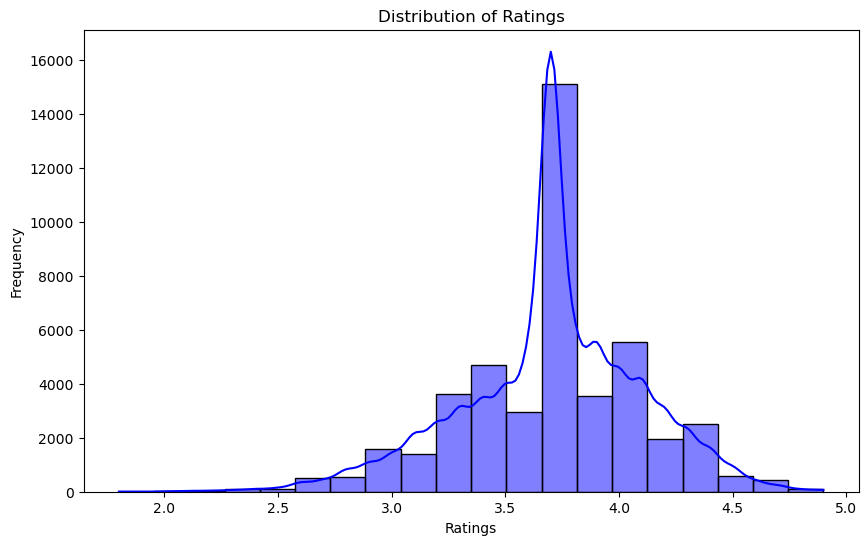

In [89]:
# Distribution of Ratings

plt.figure(figsize=(10, 6))
sns.histplot(merged_df['rate'], bins=20, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

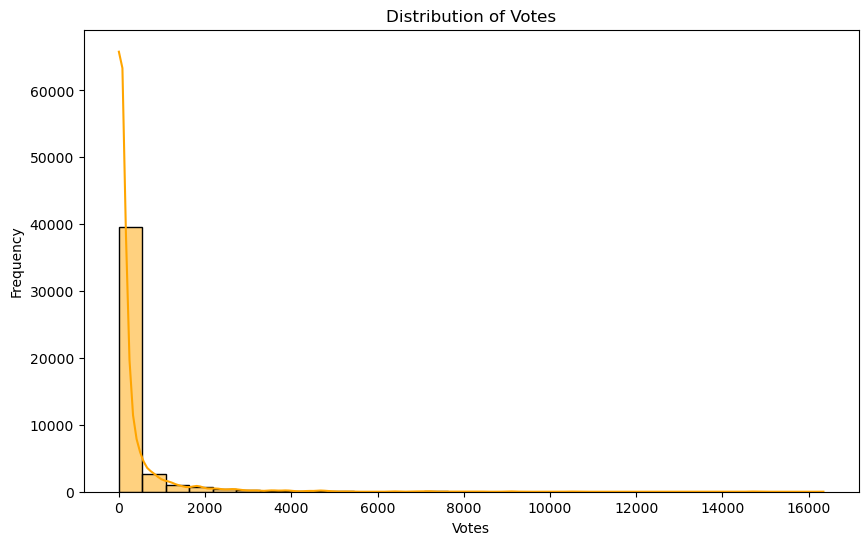

In [90]:
# Distribution of Votes
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['votes'], bins=30, kde=True, color='orange')
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.show()

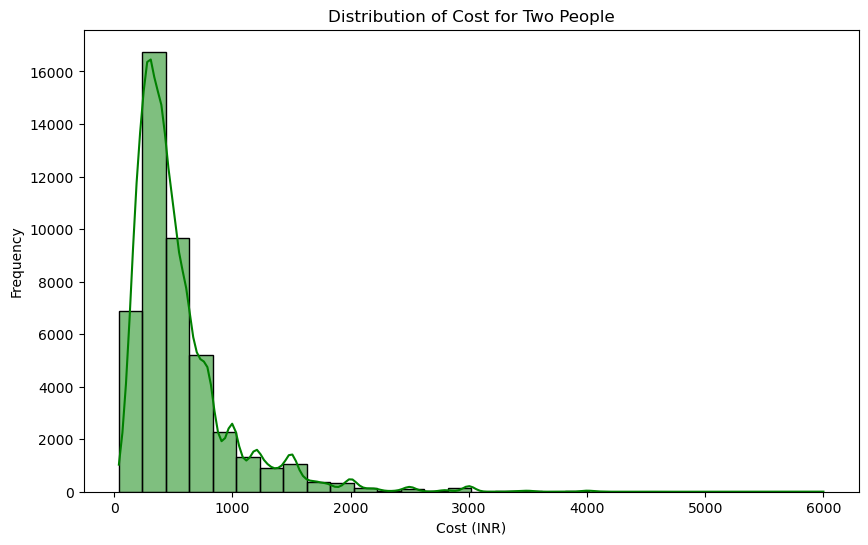

In [91]:
# Distribution of Cost
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['approx_costfor_two_people'], bins=30, kde=True, color='green')
plt.title('Distribution of Cost for Two People')
plt.xlabel('Cost (INR)')
plt.ylabel('Frequency')
plt.show()

**`📊Online Order vs Book Table Trends`**

In [92]:
order_vs_table = merged_df.groupby(['online_order', 'book_table']).size().unstack()
order_vs_table

book_table        0     1
online_order             
0             15636  2303
1             23965  3397

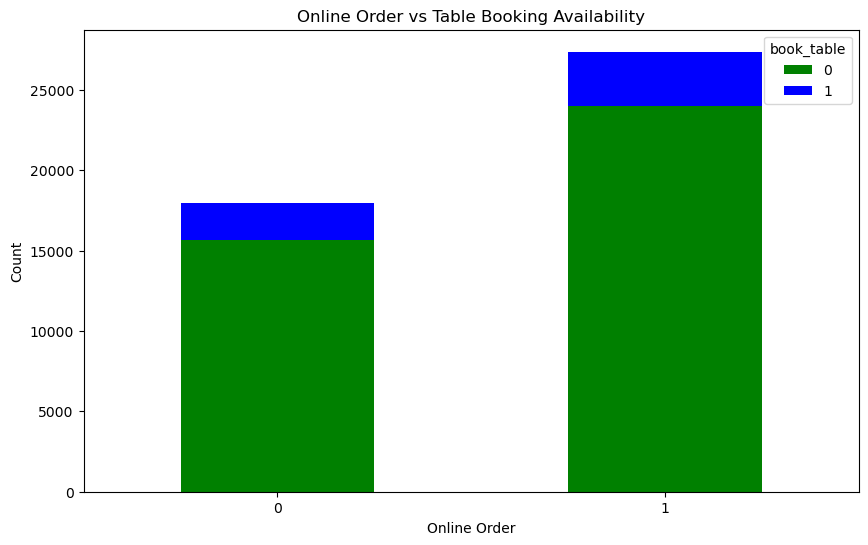

In [93]:
order_vs_table.plot(kind='bar', figsize=(10, 6), stacked=True, color=['green', 'blue'])
plt.title('Online Order vs Table Booking Availability')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**`📊Areas with High-Rated or Low-Rated Restaurants`**

In [94]:
avg_rating_area = merged_df.groupby('listed_incity')['rate'].mean().sort_values(ascending=False).head(10)
avg_rating_area

listed_incity
MG Road                  3.787395
Church Street            3.787106
Brigade Road             3.785267
Lavelle Road             3.765982
Koramangala 6th Block    3.752558
Koramangala 4th Block    3.749287
Koramangala 5th Block    3.749047
Koramangala 7th Block    3.748576
Indiranagar              3.738445
Old Airport Road         3.714812
Name: rate, dtype: float64

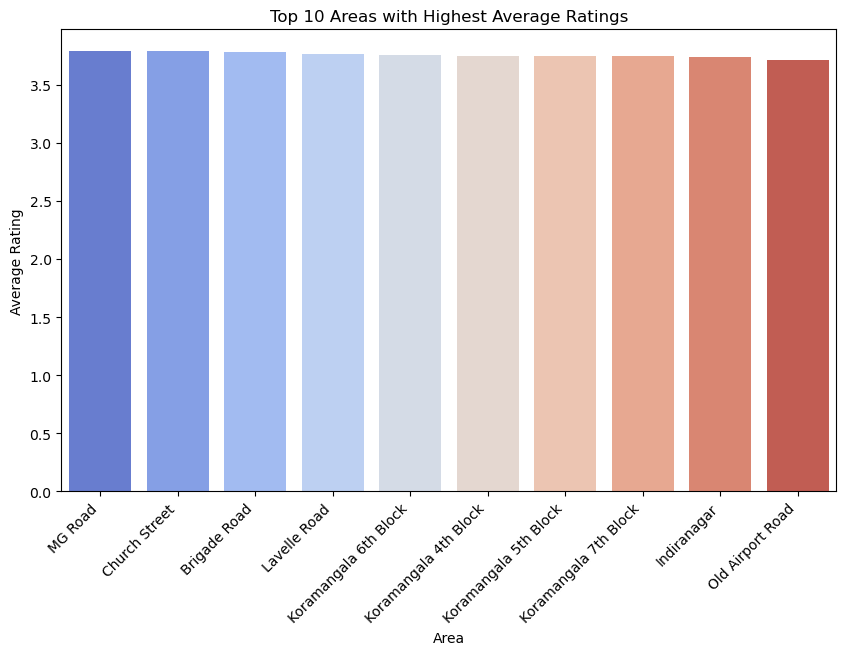

In [95]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_area.index, y=avg_rating_area.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Areas with Highest Average Ratings')
plt.xlabel('Area')
plt.ylabel('Average Rating')
plt.show()

**`📊Relationship Between Rating and Cost`**

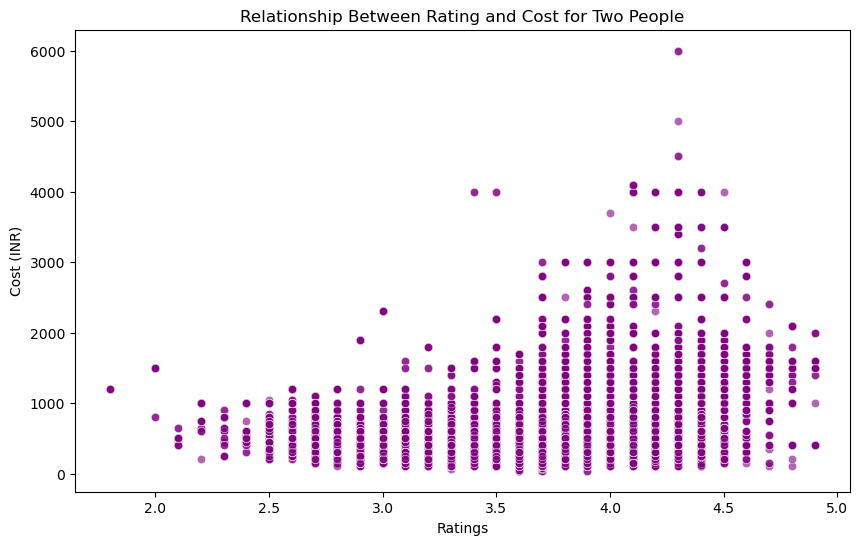

In [96]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rate', y='approx_costfor_two_people', data=merged_df, alpha=0.6, color='purple')
plt.title('Relationship Between Rating and Cost for Two People')
plt.xlabel('Ratings')
plt.ylabel('Cost (INR)')
plt.show()


**`📊Heatmap for correlation analysis between numerical features (ratings, votes, cost)`**

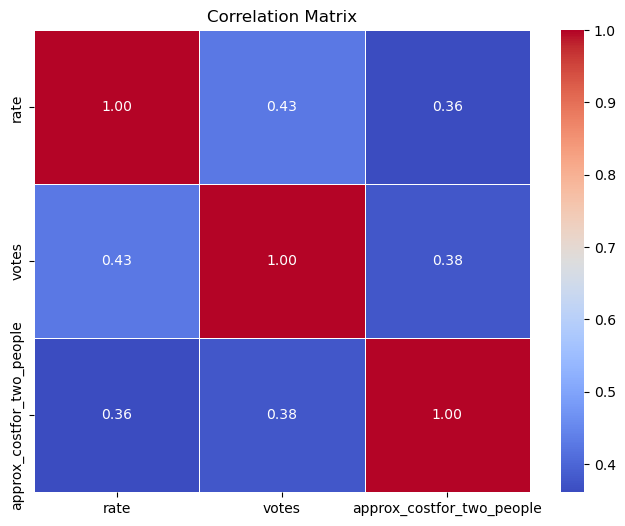

In [97]:
corr_matrix = merged_df[['rate', 'votes', 'approx_costfor_two_people']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**`📊Pair Plot for pairwise relationships`**

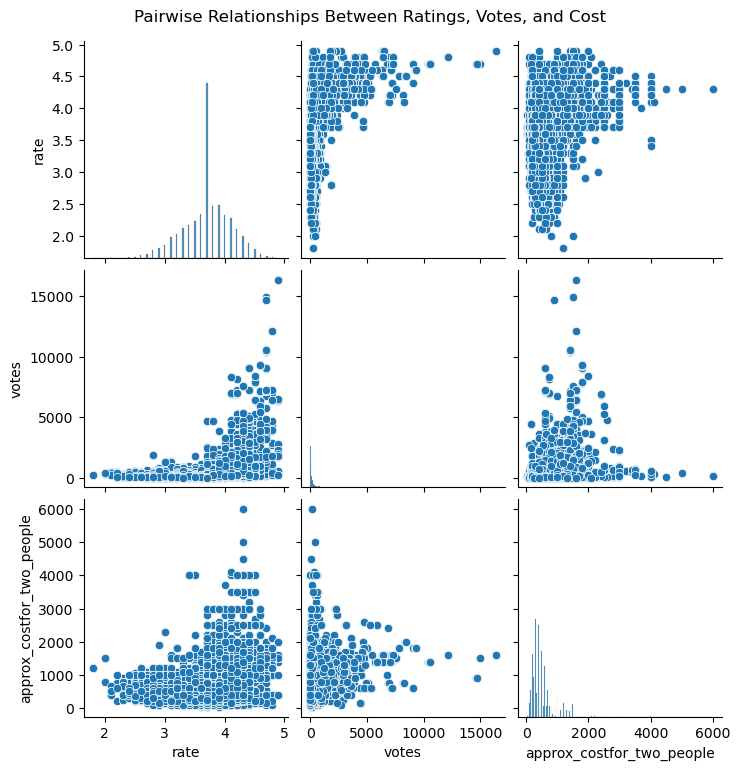

In [98]:
sns.pairplot(merged_df[['rate', 'votes', 'approx_costfor_two_people']])
plt.suptitle('Pairwise Relationships Between Ratings, Votes, and Cost', y=1.02)
plt.show()


**`📊Restaurant Ratings and Cost by Type`**

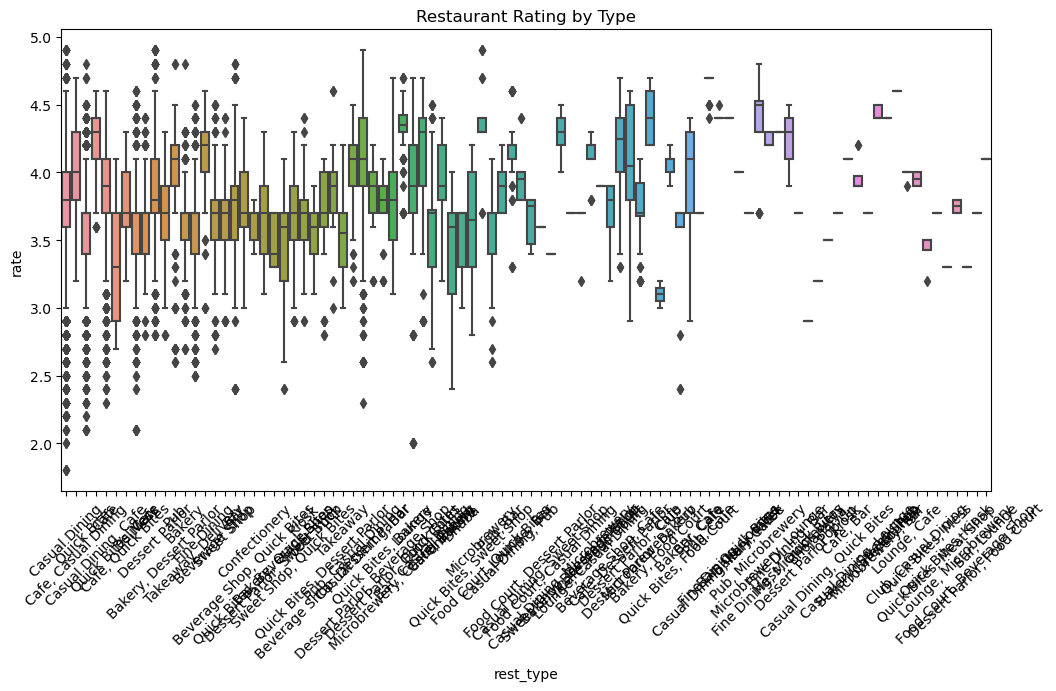

In [99]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='rest_type', y='rate', data=merged_df)
plt.title('Restaurant Rating by Type')
plt.xticks(rotation=45)
plt.show()

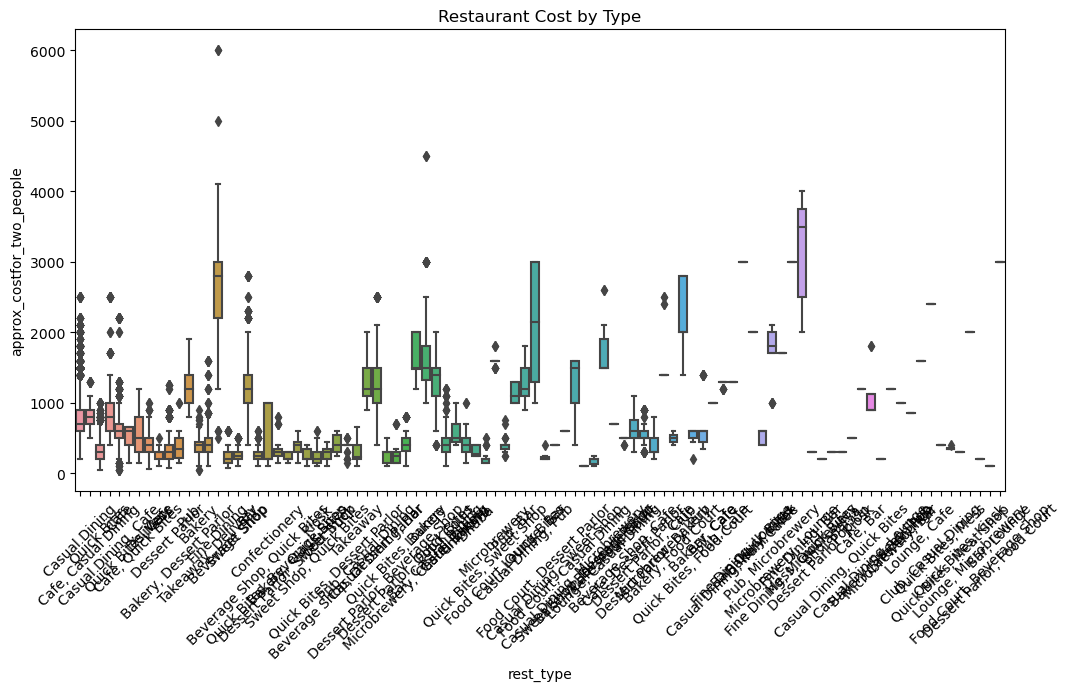

In [100]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='rest_type', y='approx_costfor_two_people', data=merged_df)
plt.title('Restaurant Cost by Type')
plt.xticks(rotation=45)
plt.show()

### `📌Summary of Insights`

`The most popular cuisines and restaurant types.`

`Areas with higher concentrations of restaurants.`

`Relationships between ratings and cost.`

`The distribution of ratings and votes.`

`Trends in online orders vs table bookings.`

### `🗺️Geospatial Visualizations (Folium)`

**`📊Restaurant Density Map`**

In [101]:
import folium
from folium.plugins import HeatMap

# Create a base map centered around Bangalore
bangalore_map = folium.Map(location=[merged_df['Latitude'].mean(), merged_df['Longitude'].mean()], zoom_start=12)

# Prepare data for heatmap: use Latitude, Longitude, and Ratings (or Votes) for density
heat_data = [[row['Latitude'], row['Longitude'], row['rate']] for index, row in merged_df.iterrows() if pd.notnull(row['Latitude'])]

# Create a HeatMap layer and add it to the map
HeatMap(heat_data).add_to(bangalore_map)

# Save the map to an HTML file
bangalore_map.save('restaurant_density_map.html')


**`📊Cuisine-Specific Map (Italian Restaurants)`**

In [102]:
import folium

# Filter for Italian restaurants
italian_df = merged_df[merged_df['cuisines'].str.contains("Italian", na=False)]

# Initialize folium map
map_italian = folium.Map(location=[12.9716, 77.5946], zoom_start=11)

# Add markers
for _, row in italian_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['cuisines']} - {row['rate']}/5",
        icon=folium.Icon(color='red')
    ).add_to(map_italian)

# Display map
map_italian


 **`📊Interactive Density Map`**

In [103]:
from folium.plugins import HeatMap

heat_data = [[row['Latitude'], row['Longitude']] for index, row in merged_df.iterrows()]
map_density = folium.Map(location=[12.9716, 77.5946], zoom_start=11)
HeatMap(heat_data).add_to(map_density)

map_density


### `📝Hypothesis Tests`

**`📊Cost for Two vs City (ANOVA Test)`**

In [104]:
from scipy.stats import f_oneway

groups = [group['approx_costfor_two_people'].dropna().astype(float) 
          for name, group in merged_df.groupby('listed_incity')]

f_stat, p_value = f_oneway(*groups)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: Average cost for two **differs across cities**.")
else:
    print("Fail to Reject Null: No significant cost difference among cities.")


P-Value: 0.0
Reject Null Hypothesis: Average cost for two **differs across cities**.


### `📈Dash Board`

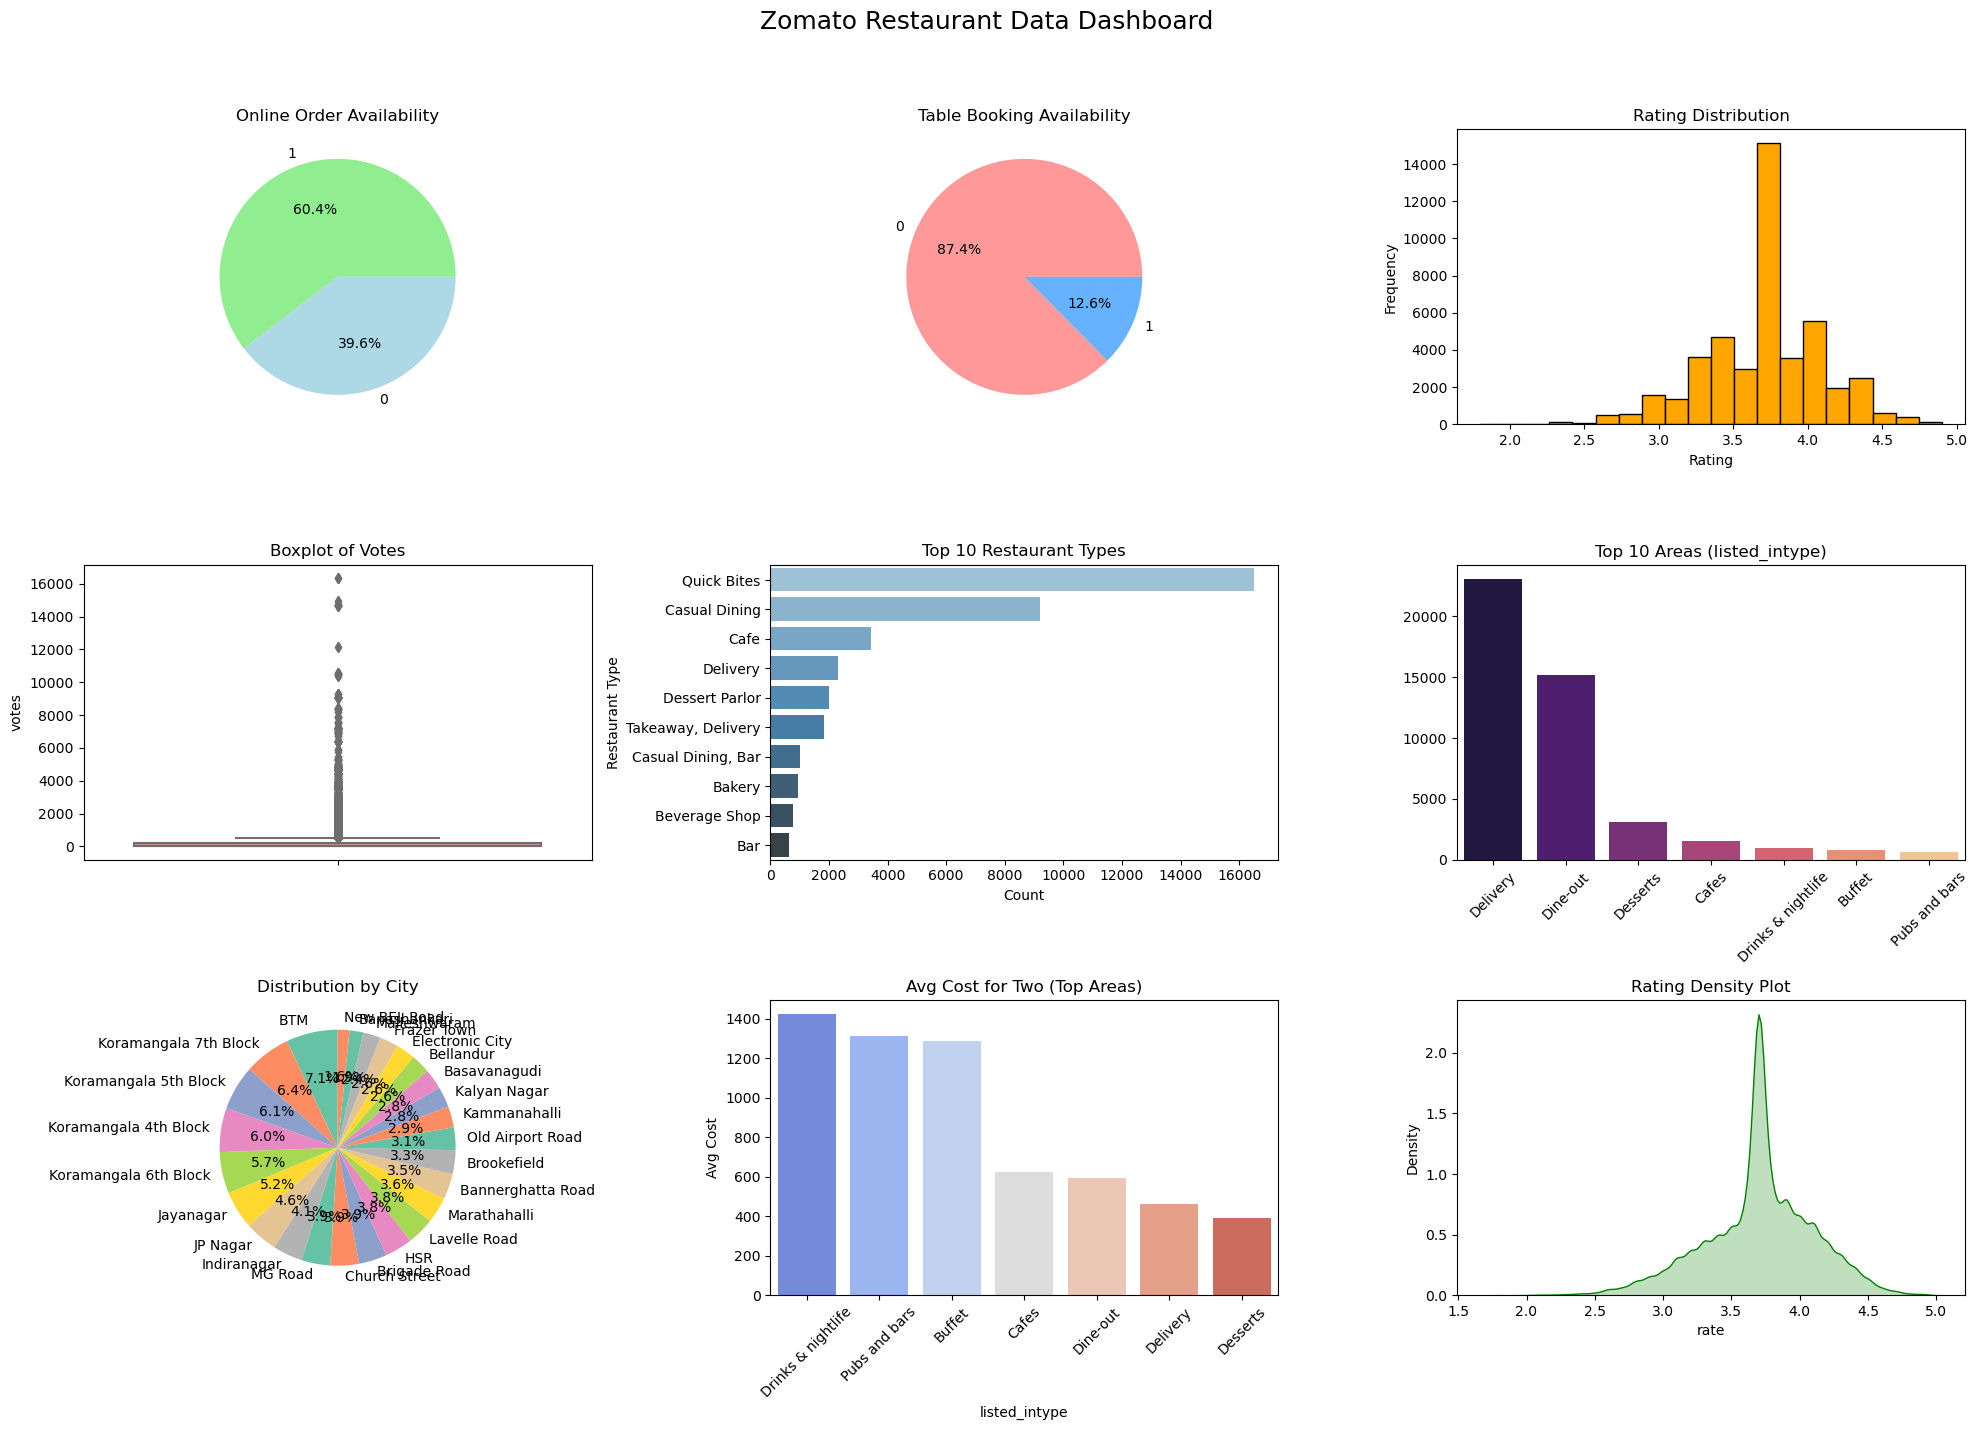

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle("Zomato Restaurant Data Dashboard", fontsize=18)

# Pie chart - Online order
merged_df['online_order'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 0], colors=['lightgreen', 'lightblue'])
axes[0, 0].set_title("Online Order Availability")
axes[0, 0].set_ylabel('')

# Pie chart - Book table
merged_df['book_table'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 1], colors=['#FF9999', '#66B2FF'])
axes[0, 1].set_title("Table Booking Availability")
axes[0, 1].set_ylabel('')

# Histogram - Rating distribution
axes[0, 2].hist(merged_df['rate'].dropna(), bins=20, color='orange', edgecolor='black')
axes[0, 2].set_title("Rating Distribution")
axes[0, 2].set_xlabel("Rating")
axes[0, 2].set_ylabel("Frequency")

# Boxplot - Votes
sns.boxplot(y=merged_df['votes'], ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title("Boxplot of Votes")

# Bar chart - Top 10 Rest Types
top_rest_types = merged_df['rest_type'].value_counts().head(10)
sns.barplot(y=top_rest_types.index, x=top_rest_types.values, ax=axes[1, 1], palette='Blues_d')
axes[1, 1].set_title("Top 10 Restaurant Types")
axes[1, 1].set_xlabel("Count")
axes[1, 1].set_ylabel("Restaurant Type")

# Bar chart - Top 10 Locations (listed_intype)
top_locations = merged_df['listed_intype'].value_counts().head(10)
sns.barplot(x=top_locations.index, y=top_locations.values, ax=axes[1, 2], palette='magma')
axes[1, 2].set_title("Top 10 Areas (listed_intype)")
axes[1, 2].tick_params(axis='x', rotation=45)

# Pie chart - City-wise Distribution
merged_df['listed_incity'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[2, 0], startangle=90, colors=sns.color_palette('Set2'))
axes[2, 0].set_title("Distribution by City")
axes[2, 0].set_ylabel('')

# Bar chart - Avg cost for 2 by top 10 areas
avg_cost = merged_df.groupby('listed_intype')['approx_costfor_two_people'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_cost.index, y=avg_cost.values, ax=axes[2, 1], palette='coolwarm')
axes[2, 1].set_title("Avg Cost for Two (Top Areas)")
axes[2, 1].tick_params(axis='x', rotation=45)
axes[2, 1].set_ylabel("Avg Cost")

# KDE plot - Rating density
sns.kdeplot(data=merged_df, x='rate', fill=True, ax=axes[2, 2], color='green')
axes[2, 2].set_title("Rating Density Plot")

# Adjust layout and save
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("Zomato_Dashboard.jpg")
plt.show()


### `📌Summary & Conclusion:`

This analysis delves into Bangalore's restaurant trends using a Zomato dataset. The primary goal was to uncover key insights related to restaurant types, cuisines, customer preferences, cost distribution, and geographic patterns.

**Key findings include:**

`Top Cuisines and Restaurant Types:` Popular cuisines and restaurant types in Bangalore were identified, showing consumer preferences.`

`Online Orders vs Table Bookings:` A significant trend towards online ordering was observed, reflecting changing dining habits.

`Cost and Ratings:` The distribution of restaurant costs and ratings revealed insights into pricing strategies and customer satisfaction.

`Geospatial Insights:` Heatmaps indicated areas with high restaurant density, offering opportunities for businesses to target specific regions.

`Correlation Analysis:` Ratings, votes, and cost displayed some interesting relationships, particularly regarding customer satisfaction and pricing.

In conclusion, this analysis provides actionable insights that can help restaurant owners and marketers understand consumer trends, optimize pricing, and identify high-demand areas for potential expansion.










### `Answer MCQ`

**1. What is the shape of the given dataset?**

In [106]:
df_restaurants = pd.read_csv(r"C:\Users\Arpan Ghosh\OneDrive\Desktop\Hackathon Zomato\zomato_data.csv")

In [107]:
df_restaurants.shape

(51717, 10)

**2. How many restaurants serve North Indian cuisine?**

In [108]:
north_indian_count = df_restaurants[df_restaurants['cuisines'].str.contains('North Indian', na=False)].shape[0]
print("Number of restaurants serving North Indian cuisine:", north_indian_count)


Number of restaurants serving North Indian cuisine: 21085


**3. What cuisine is most commonly offered by restaurants in Bangalore?**

In [109]:
# Drop NA and split multiple cuisines
from collections import Counter

cuisine_series = merged_df['cuisines'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
flat_cuisine_list = [item for sublist in cuisine_series for item in sublist]
cuisine_counts = Counter(flat_cuisine_list)

# Get the most common cuisine
most_common_cuisine = cuisine_counts.most_common(1)[0]
print("Most commonly offered cuisine in Bangalore:", most_common_cuisine[0])
print("Number of restaurants offering it:", most_common_cuisine[1])


Most commonly offered cuisine in Bangalore: North Indian
Number of restaurants offering it: 18395


**4. Which locality in Bangalore has the highest average cost for dining (for two people)?**

In [110]:
# First, ensure approx_costfor_two_people is numeric
merged_df['approx_costfor_two_people'] = pd.to_numeric(merged_df['approx_costfor_two_people'], errors='coerce')

# Group by locality and calculate mean cost
avg_cost_by_locality = merged_df.groupby('listed_incity')['approx_costfor_two_people'].mean().sort_values(ascending=False)

# Display the top locality
top_locality = avg_cost_by_locality.idxmax()
top_cost = avg_cost_by_locality.max()

print(f"The locality with the highest average dining cost is: {top_locality}")
print(f"Average cost for two people: ₹{top_cost:.2f}")


The locality with the highest average dining cost is: Church Street
Average cost for two people: ₹777.67


**5. Which restaurant type has the top rating with over 1000 votes?**

In [111]:
# Filter restaurants with more than 1000 votes
filtered_df = merged_df[merged_df['votes'] > 1000]

# Group by 'rest_type' and find the average rating
rest_type_rating = filtered_df.groupby('rest_type')['rate'].mean().sort_values(ascending=False)

# Get the top-rated restaurant type
top_rest_type = rest_type_rating.idxmax()
top_rating = rest_type_rating.max()

print(f"The restaurant type with the highest average rating (with >1000 votes) is: {top_rest_type}")
print(f"Average rating: {top_rating:.2f}")


The restaurant type with the highest average rating (with >1000 votes) is: Bakery
Average rating: 4.80


In [112]:
merged_df.head()

online_order  book_table  rate  votes            rest_type  \
0             1           1   4.1    775        Casual Dining   
1             1           0   4.1    787        Casual Dining   
2             1           0   3.8    918  Cafe, Casual Dining   
3             0           0   3.7     88          Quick Bites   
4             0           0   3.8    166        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_costfor_two_people listed_intype  \
0  North Indian, Mughlai, Chinese                        800        Buffet   
1     Chinese, North Indian, Thai                        800        Buffet   
2          Cafe, Mexican, Italian                        800        Buffet   
3      South Indian, North Indian                        300        Buffet   
4        North Indian, Rajasthani                        600        Buffet   

  listed_incity   Latitude  Longitude  
0  Banashankari  12.939333  77.553982  
1  Banashankari  12.939333  77.553982  
2  Banashankari  12.939333  77.553982  
3  Banashankari  12.939333  77.553982  
4  Banashankari  12.939333  77.553982

**6. How much does it cost at minimum to eat out in Bangalore?**

In [118]:
merged_df[merged_df["book_table"] == 1]['approx_costfor_two_people'].min()

200

**7. What percentage of total online orders is received by restaurants in Banashankari?**

In [139]:
# Normalize and clean 'online_order' and 'listed_incity' columns
merged_df['online_order'] = merged_df['online_order'].astype(int)
merged_df['listed_incity'] = merged_df['listed_incity'].astype(str).str.strip().str.title()

# Filter restaurants that accept online orders
online_orders_df = merged_df[merged_df['online_order'] == 1]

# Total online orders
total_online_orders = online_orders_df.shape[0]

# Banashankari online orders
banashankari_online_orders = online_orders_df[online_orders_df['listed_incity'] == 'Banashankari'].shape[0]

# Percentage calculation
percentage = (banashankari_online_orders / total_online_orders) * 100

print(f"Total Online Orders: {total_online_orders}")
print(f"Banashankari Online Orders: {banashankari_online_orders}")
print(f"Percentage of online orders from Banashankari: {percentage:.2f}%")


Total Online Orders: 27362
Banashankari Online Orders: 545
Percentage of online orders from Banashankari: 1.99%


**8. Which locality has the most restaurants with over 500 votes and a rating below 3.0?**

In [140]:
# Filter restaurants with more than 500 votes and rating below 3.0
filtered_df = merged_df[(merged_df['votes'] > 500) & (merged_df['rate'] < 3.0)]

# Count number of such restaurants per locality
locality_counts = filtered_df['listed_incity'].value_counts()

# Show the top locality
top_locality = locality_counts.idxmax()
count = locality_counts.max()

print(f"Locality with most such restaurants: {top_locality} ({count} restaurants)")


Locality with most such restaurants: Brookefield (8 restaurants)


**9. Which locality in Bangalore should Zomato target for expansion based on restaurant type diversity?**

In [141]:
# Count unique restaurant types in each locality
locality_rest_type_diversity = merged_df.groupby('listed_incity')['rest_type'].nunique()

# Identify the locality with the highest diversity
top_locality_for_expansion = locality_rest_type_diversity.idxmax()
top_diversity_count = locality_rest_type_diversity.max()

print(f"Locality with the most restaurant type diversity: {top_locality_for_expansion} ({top_diversity_count} types)")


Locality with the most restaurant type diversity: Btm (62 types)


**10. What's the average cost difference between buffet and delivery restaurants?**

In [148]:
# Filter the dataset for buffet and delivery restaurants
buffet_restaurants = merged_df[merged_df['rest_type'].str.contains('Buffet', na=False)]
delivery_restaurants = merged_df[merged_df['rest_type'].str.contains('Delivery', na=False)]

# Calculate the average cost for both types
average_buffet_cost = buffet_restaurants['approx_costfor_two_people'].mean()
average_delivery_cost = delivery_restaurants['approx_costfor_two_people'].mean()

# Calculate the difference
cost_difference = abs(average_buffet_cost - average_delivery_cost)

print(f"Average buffet restaurant cost: ₹{average_buffet_cost:.2f}")
print(f"Average delivery restaurant cost: ₹{average_delivery_cost:.2f}")
print(f"Cost difference: ₹{cost_difference:.2f}")


Average buffet restaurant cost: ₹nan
Average delivery restaurant cost: ₹414.58
Cost difference: ₹nan


**11 . What is the maximum number of votes received by any restaurant with online ordering?**

In [149]:
# Filter the dataset for restaurants that accept online orders
online_orders_df = merged_df[merged_df['online_order'] == 1]

# Find the maximum number of votes
max_votes = online_orders_df['votes'].max()

print(f"Maximum number of votes received by any restaurant with online ordering: {max_votes}")


Maximum number of votes received by any restaurant with online ordering: 16345


**12. What is the average rating of restaurants that serve both North Indian and Chinese cuisines?**

In [152]:
# Filter the dataset for restaurants that serve both North Indian and Chinese cuisines
north_indian_chinese_df = merged_df[merged_df['cuisines'].str.contains('North Indian') & merged_df['cuisines'].str.contains('Chinese')]

# Calculate the average rating for these restaurants
average_rating = north_indian_chinese_df['rate'].mean()

print(f"Average rating of restaurants that serve both North Indian and Chinese cuisines: {average_rating:.2f}")


Average rating of restaurants that serve both North Indian and Chinese cuisines: 3.59


**13. What is the most profitable area for Zomato based on potential revenue estimation?**

In [153]:
# Group the data by locality and calculate the total revenue and total votes for each area
locality_revenue = merged_df.groupby('listed_incity').agg(
    total_revenue=('approx_costfor_two_people', 'sum'),
    total_votes=('votes', 'sum')
)

# Calculate the strike rate for each locality
locality_revenue['strike_rate'] = (locality_revenue['total_revenue'] / locality_revenue['total_votes']) * 100

# Find the locality with the highest strike rate
most_profitable_area = locality_revenue['strike_rate'].idxmax()

print(f"The most profitable area for Zomato based on potential revenue estimation is: {most_profitable_area}")


The most profitable area for Zomato based on potential revenue estimation is: Electronic City


**14. If Zomato wants to reduce customer complaints, which restaurant type should they focus on?**

In [154]:
# Group by restaurant type and calculate the average rating for each type
avg_rating_by_rest_type = merged_df.groupby('rest_type')['rate'].mean()

# Find the restaurant type with the lowest average rating
worst_rest_type = avg_rating_by_rest_type.idxmin()

print(f"The restaurant type Zomato should focus on to reduce customer complaints is: {worst_rest_type}")


The restaurant type Zomato should focus on to reduce customer complaints is: Dessert Parlor, Kiosk


**15. In which area should Zomato invest by considering high rating (rate > 4.2), high number of votes (> 500) and including online orders?**

In [155]:
# Filter for restaurants with a rating greater than 4.2, more than 500 votes, and online ordering enabled
filtered_df = merged_df[(merged_df['rate'] > 4.2) & 
                        (merged_df['votes'] > 500) & 
                        (merged_df['online_order'] == 1)]

# Group by locality and count the number of such restaurants in each locality
locality_count = filtered_df['listed_incity'].value_counts()

# Display the locality with the highest count
top_locality = locality_count.idxmax()

print(f"The area Zomato should invest in based on high rating, high number of votes, and online orders is: {top_locality}")


The area Zomato should invest in based on high rating, high number of votes, and online orders is: Mg Road


**########################## ✅-END-✅ ###############################**